#### IMPORTS

In [2467]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from docs import *
from models import *
from config import *

#### CUDA

In [2468]:
try:
    print(f'Using: {torch.cuda.get_device_name(DEVICE)}')
except ValueError:
    print(f'Using: CPU')

Using: AMD Radeon RX 6600


### NETWORK INSTANTIATION

In [2469]:
# last = find_files(f'{RESOURCES}/models/rnn8/model_*')[-1][:-3]
last = f'{RESOURCES}/models/rnn8/model_311'

parameters = {
    'module': RNN_2xR1,
    'module_parameters': {
        'input_size': n_letters,
        'hidden_size': 512,
        'output_size': n_labels,
        'device': DEVICE,
    },
    'optimizer': torch.optim.Adam,
    'optimizer_parameters': {
        'lr':  0.01,
    },
    'criterion': nn.CrossEntropyLoss,
    'criterion_parameters': {},
    'pretrained': True,
    'path': last,
}

In [2470]:
rnn = build_model(**parameters)

### TESTS

In [2471]:


docs = [
    ('Yes', 'trichos.ru-privacy-policy.html.txt'),
    ('Yes', 'цдб.цбсессентуки.рф-politica.html.html.txt'),
    ('Yes', 'chalet-msk.ru-politika-konfidencialnosti.html.txt'),
    ('Yes', 'позитивфото.рф-msk-politika-konfidenczialnosti.html.html.txt'),
    ('Yes', 'zvetnoe.ru-policy.html.txt'),
    ('Yes', 'zubzdorov.ru-politconf.html.txt'),
    ('Yes', 'zaobkz.ru-policy_agreement.html.txt'),
    ('Yes', 'zoomarket72.ru-police.html.txt'),
    ('Yes', 'zolotovyatki.ru-politika-konfidentsialnosti.html.txt'),
    ('Yes', 'zelentut.ru-politika-konfidencialnosti.html.txt'),
    ('Yes', 'чопохрана.рф-confidential.html.txt'),
    ('Yes', 'www.starwarsshop.ru-info-order-status.html.txt'),

    ('No', 'sks123.ru-privacy.html.txt'),
    ('No', 'zpromgaz.ru-policy.html.html.txt'),
    ('No', 'zemlya44.ru-policy-privacy_policy.pdf.html.txt'),
    ('No', 'tradicii-spb.ru-info-customer-pravo.html.txt'),
    ('No', 'zolotorevka.ucoz.ru-index-0-10.html.txt'),
    ('No', 'zerkalosteklo.ru-include-licenses_detail.php.html.txt'),
    ('No', 'zabor-sad.ru-wp-content-uploads-2019-03-privacy.pdf.html.txt'),
    ('No', 'taxomat22.h16.ru-user_agreement.html.txt'),
    ('No', 'zvezdahotel.ru-policy.html.txt'),
    ('No', 'zerkalosteklo.ru-include-licenses_detail.php.html.txt'),
]

docs = [(l, read_lines(f'{VALIDATION_DATA}/plain_policies/{d}')) for (l, d) in docs]

with torch.no_grad():
    for it, (label, sample) in enumerate(docs, 1):
        output, loss = rnn.test(label_to_tensor(label), doc_to_tensor(sample))

        predicted_label = predicted_to_label(output)
        correctness = '✓ ' if predicted_label == label else f'✗ '

        print(f'{it:3}. {predicted_label} {correctness} (error {loss:.4f})')


  1. Yes ✓  (error 0.0000)
  2. Yes ✓  (error 0.0046)
  3. Yes ✓  (error 0.0000)
  4. Yes ✓  (error 0.0000)
  5. Yes ✓  (error 0.0000)
  6. Yes ✓  (error 0.0050)
  7. Yes ✓  (error 0.0000)
  8. Yes ✓  (error 0.0586)
  9. Yes ✓  (error 0.0470)
 10. Yes ✓  (error 0.0000)
 11. Yes ✓  (error 0.0631)
 12. Yes ✓  (error 0.0240)
 13. No ✓  (error 0.1544)
 14. No ✓  (error 0.0747)
 15. No ✓  (error 0.1544)
 16. No ✓  (error 0.1348)
 17. Yes ✗  (error 0.9555)
 18. No ✓  (error 0.0246)
 19. No ✓  (error 0.0000)
 20. No ✓  (error 0.0012)
 21. No ✓  (error 0.0030)
 22. No ✓  (error 0.0246)


### PLOTS

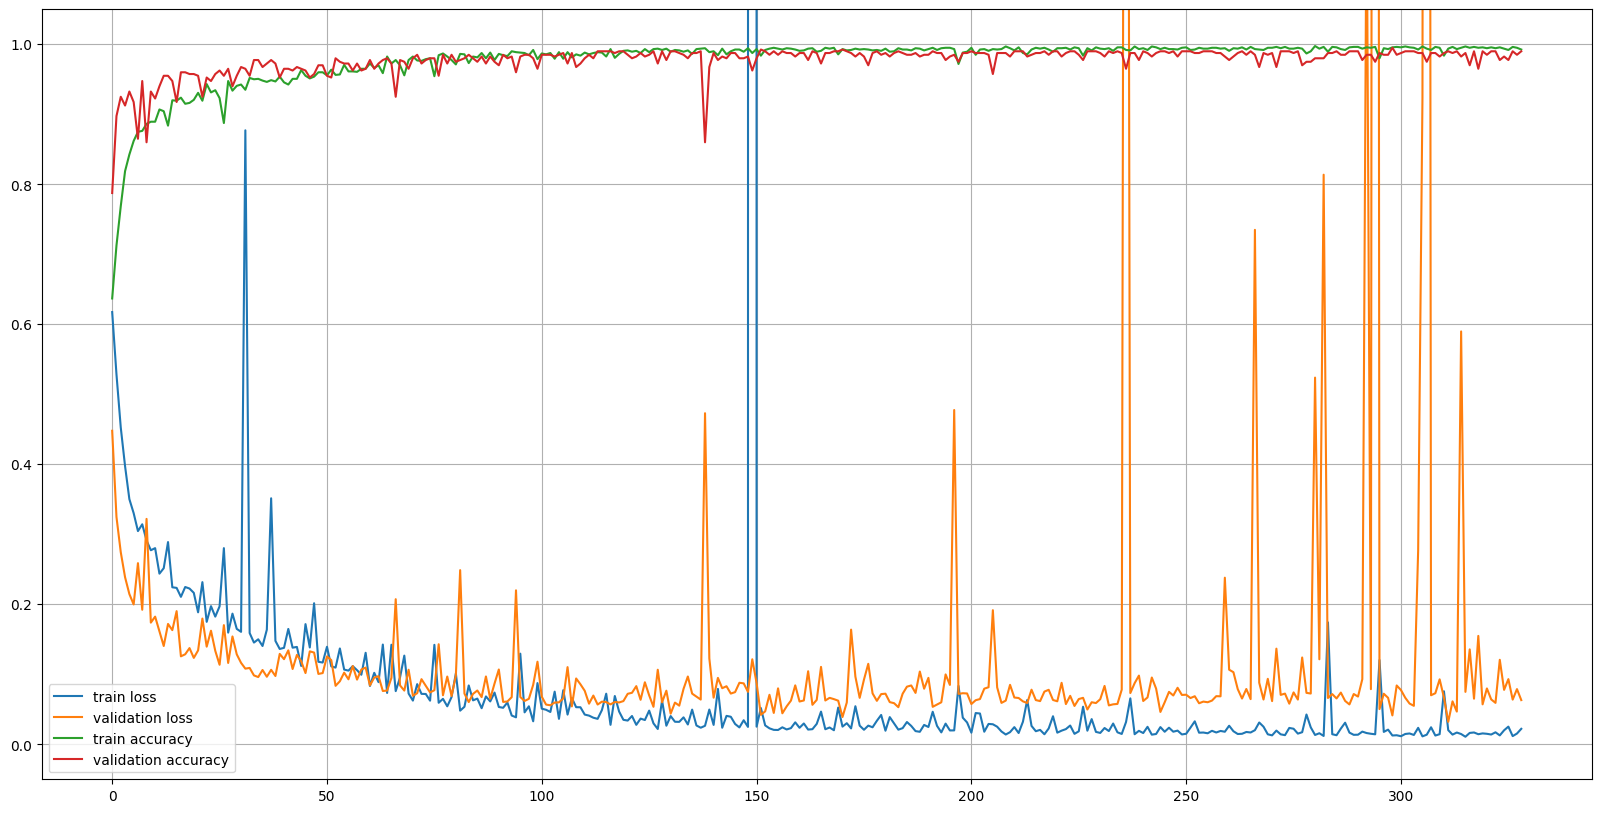

TA=0.9925, VA=0.99


In [2472]:
# PLOTS
plt.figure(figsize=(20,10))
plt.ylim([-.05, 1.05])
plt.grid()
plt.plot(rnn.train_losses)
plt.plot(rnn.validation_losses)
plt.plot(rnn.train_accuracies)
plt.plot(rnn.validation_accuracies)
plt.legend(['train loss', 'validation loss', 'train accuracy', 'validation accuracy'])
plt.show()

print(f'TA={rnn.train_accuracies[-1]}, VA={rnn.validation_accuracies[-1]}')